In [ ]:
#numpy and pandas
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#size of figures
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DATA CLEANING


In [ ]:
def standardize_cases_date(date):
  """
  Returns a reformated date that is separated with dashes(-) insteand of (/)
  Input: MM/DD/YEAR
  Output format: MM-DD-YEAR
  To be used on COVID CASES DATASET
  """
  split_date = date.split("/")
  new_date = "-".join(split_date)
  return new_date

In [ ]:
def standardize_crashes_date(date):
  """
  Returns reformated date to match the other dataset
  Input: YEAR-MM-DD
  Output format: MM-DD-YEAR
  To be used to NYC CRASHES DATASET
  """
  split_date = date.split("-")
  year = split_date[0]
  month = split_date[1]
  day = split_date[2]
  new_date = [month, day, year]
  return "-".join(new_date)


# COVID CASES IN NYC DATASET


In [ ]:
df_cases = pd.read_csv("https://raw.githubusercontent.com/nychealth/coronavirus-data/master/trends/data-by-day.csv")

In [ ]:
#what it looks like
df_cases.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,ALL_DEATH_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BX_CASE_COUNT_7DAY_AVG,BX_HOSPITALIZED_COUNT_7DAY_AVG,BX_DEATH_COUNT_7DAY_AVG,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BK_CASE_COUNT_7DAY_AVG,BK_HOSPITALIZED_COUNT_7DAY_AVG,BK_DEATH_COUNT_7DAY_AVG,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,MN_CASE_COUNT_7DAY_AVG,MN_HOSPITALIZED_COUNT_7DAY_AVG,MN_DEATH_COUNT_7DAY_AVG,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,QN_CASE_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT_7DAY_AVG,QN_DEATH_COUNT_7DAY_AVG,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#only keeping the date column and cases count for that day, everything else removed
df_cases = df_cases.loc[:, ['date_of_interest', 'CASE_COUNT']]
df_cases.head()

,date_of_interest,CASE_COUNT
0,02/29/2020,1
1,03/01/2020,0
2,03/02/2020,0
3,03/03/2020,1
4,03/04/2020,5


In [ ]:
#renaming columnns
df_cases.rename(columns={'date_of_interest':'date', 'CASE_COUNT':'case_count',},inplace=True) 
df_cases.head()

,date,case_count
0,02/29/2020,1
1,03/01/2020,0
2,03/02/2020,0
3,03/03/2020,1
4,03/04/2020,5


In [ ]:
df_cases['date'] = df_cases['date'].apply(standardize_cases_date)
df_cases

,date,case_count
0,02-29-2020,1
1,03-01-2020,0
2,03-02-2020,0
3,03-03-2020,1
4,03-04-2020,5
...,...,...
282,12-07-2020,3101
283,12-08-2020,2778
284,12-09-2020,2450
285,12-10-2020,1788


# NYC TRAFFIC COLLISIONS DATASET

In [ ]:
df_crashes = pd.read_csv("NYC Accidents 2020.csv")

In [ ]:
df_crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,0,0,0,0,0,0,0,0,Passing Too Closely,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,2,0,0,0,0,0,2,0,Reaction to Uninvolved Vehicle,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,0,0,0,0,0,0,0,0,Unsafe Speed,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [ ]:
#getting rid of unecessary columns
df_crashes = df_crashes.loc[:, ['CRASH DATE']]
df_crashes.head()

,CRASH DATE
0,2020-08-29
1,2020-08-29
2,2020-08-29
3,2020-08-29
4,2020-08-29


In [ ]:
df_crashes.rename(columns={'CRASH DATE':'date'}, inplace=True) 

In [ ]:
df_crashes['crash_count'] = 1
df_crashes.head()

,date,crash_count
0,2020-08-29,1
1,2020-08-29,1
2,2020-08-29,1
3,2020-08-29,1
4,2020-08-29,1


In [ ]:
#getting crash counts
aggregate_func = {'crash_count': 'sum'}
df_crashes = df_crashes.groupby('date', as_index=False).aggregate(aggregate_func)

### Cleaned up NYC crashes dataframe


In [ ]:
df_crashes['date'] = df_crashes['date'].apply(standardize_crashes_date)
df_crashes

,date,crash_count
0,01-01-2020,336
1,01-02-2020,409
2,01-03-2020,452
3,01-04-2020,347
4,01-05-2020,286
...,...,...
237,08-25-2020,264
238,08-26-2020,280
239,08-27-2020,281
240,08-28-2020,238


### Cleaned up NYC covid cases dataframe

In [ ]:
df_cases

,date,case_count
0,02-29-2020,1
1,03-01-2020,0
2,03-02-2020,0
3,03-03-2020,1
4,03-04-2020,5
...,...,...
282,12-07-2020,3101
283,12-08-2020,2778
284,12-09-2020,2450
285,12-10-2020,1788


Merging datasets


In [ ]:
#inner merge on the two dataframs
df = pd.merge(df_cases, df_crashes, on='date')
df_old = df
df.head()

,date,case_count,crash_count
0,02-29-2020,1,456
1,03-01-2020,0,423
2,03-02-2020,0,562
3,03-03-2020,1,550
4,03-04-2020,5,541


Text(0, 0.5, 'Crashes')

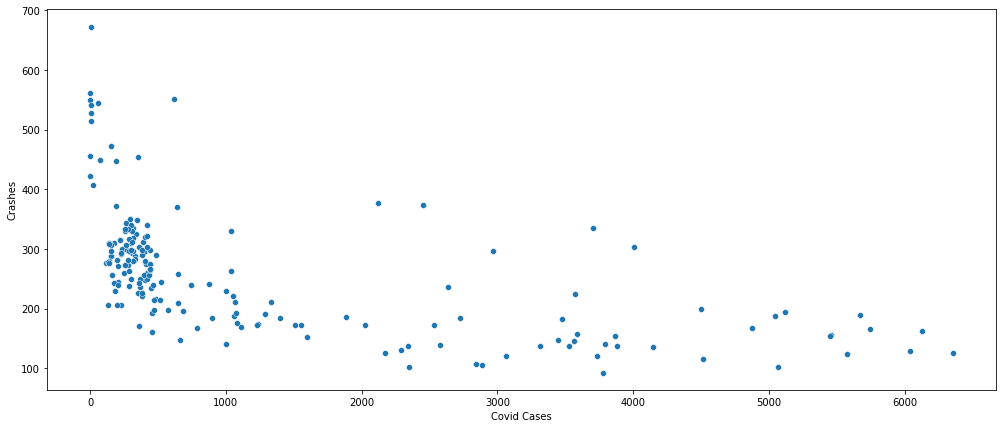

In [ ]:
sns.scatterplot(x='case_count', y='crash_count', data=df)
plt.xlabel('Covid Cases')
plt.ylabel('Crashes')

In [ ]:
#getting rid of outliers (like 0 and 1 cases in beginning of march)
df = df[df['case_count'] > 10] 
df.head()

,date,case_count,crash_count
8,03-08-2020,21,408
9,03-09-2020,57,545
10,03-10-2020,69,449
11,03-11-2020,155,473
12,03-12-2020,355,455


# Assumptions of Linear Regression
1. Linear relationship
2. Multivariate normality
3. No multicollinearity
4. No auto-correlation
5. Homoscedasticity



Text(0, 0.5, 'Crashes')

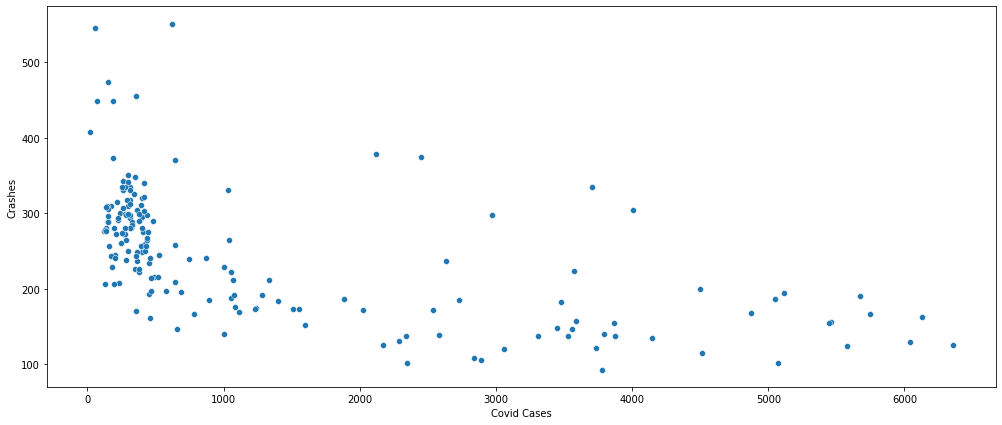

In [ ]:
sns.scatterplot(x='case_count', y='crash_count', data=df)
plt.xlabel('Covid Cases')
plt.ylabel('Crashes')

1. **Linear Relationship**: observing the scatterplot above, we can see that there does indeed exist some sort of linear relationship.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Daily Crashes Count')

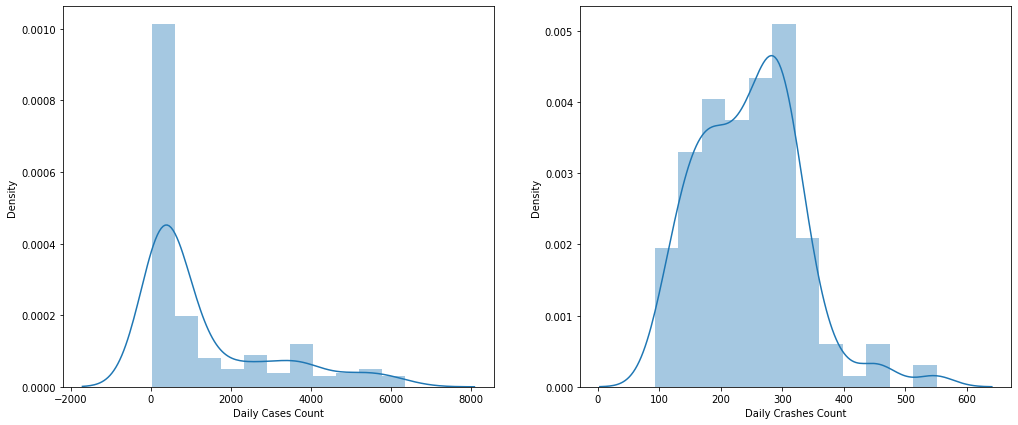

In [ ]:
plt.subplot(1, 2, 1)
sns.distplot(df['case_count'])
plt.xlabel('Daily Cases Count')

plt.subplot(1, 2, 2)
sns.distplot(df['crash_count'])
plt.xlabel('Daily Crashes Count')

Both datasets seemed to be skewed to the right, we can apply logarithmic transformation to the data to help us with out analysis

In [ ]:
df['case_count10'] = np.log10(df['case_count'])
df['crash_count10'] = np.log10(df['crash_count'])
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,case_count,crash_count,case_count10,crash_count10
8,03-08-2020,21,408,1.322219,2.610660
9,03-09-2020,57,545,1.755875,2.736397
10,03-10-2020,69,449,1.838849,2.652246
11,03-11-2020,155,473,2.190332,2.674861
12,03-12-2020,355,455,2.550228,2.658011


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'log10(Daily Crashes Count')

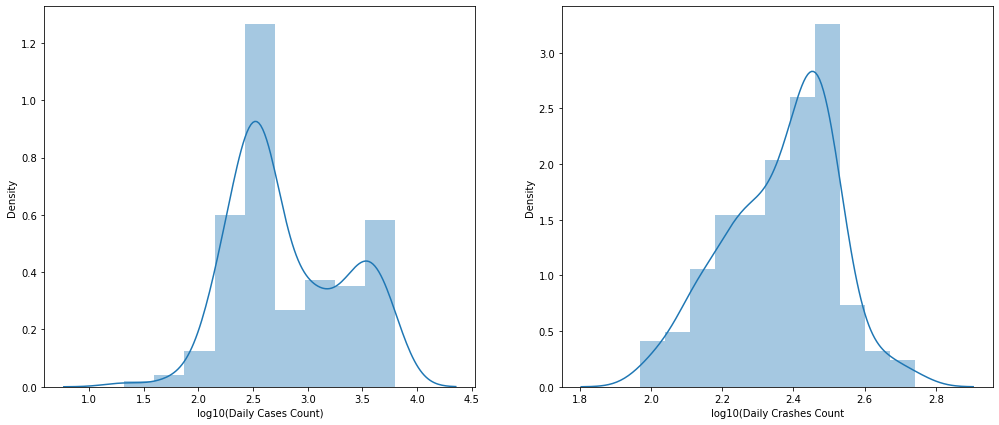

In [ ]:

plt.subplot(1, 2, 1)
sns.distplot(df['case_count10'])
plt.xlabel('log10(Daily Cases Count)')

plt.subplot(1, 2, 2)
sns.distplot(df['crash_count10'])
plt.xlabel('log10(Daily Crashes Count)')

Text(0.5, 1.0, 'Log Transformed Data')

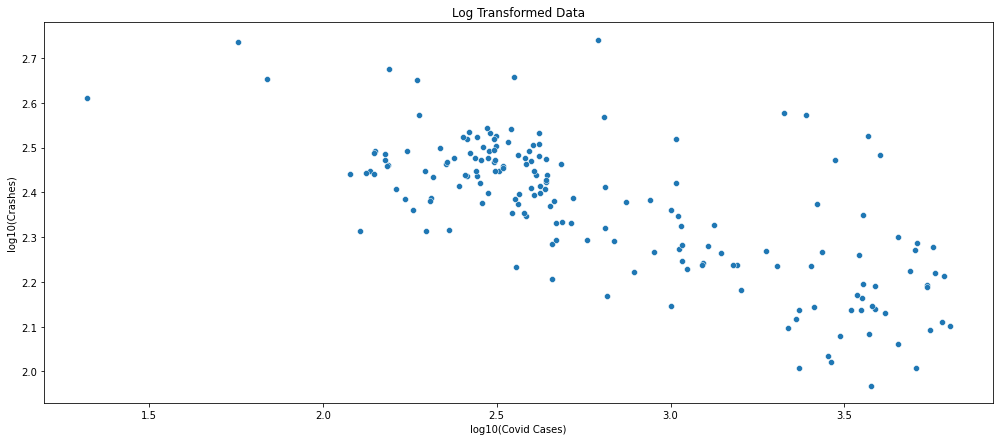

In [ ]:
sns.scatterplot(x='case_count10', y='crash_count10', data=df)
plt.xlabel('log10(Covid Cases)')
plt.ylabel('log10(Crashes)')
plt.title("Log Transformed Data")

2. **Multivariate normality**: Data is transfored to ensure that we can assume that the variables were using for linear regression have a normal distribution.

In [ ]:
df.corr()

,case_count,crash_count,case_count10,crash_count10
case_count,1.000000,-0.582232,0.903319,-0.651308
crash_count,-0.582232,1.000000,-0.675847,0.973422
case_count10,0.903319,-0.675847,1.000000,-0.724459
crash_count10,-0.651308,0.973422,-0.724459,1.000000


3. **No multicollinearity**: Correlation matrix calculated above, we can observe that the number of COVID-19 cases is not highly correlated with the number of car crashes. The same can also be applied to the log transformed variables.
4. **No auto-correlation**: Variables are not auto correlated
5. **Homoscedasticity**: Variance in the log transformed scatterplot appears to be about the same across the data points.

All assumptions needed for linear regression are proven. We can now proceed with carrying out regression

# Linear Regression with Log Transformed Data



In [ ]:
# carry out regression using log-transformed predictor
outcome, predictors = patsy.dmatrices('crash_count10 ~ case_count10', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          crash_count10   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           9.26e-30
Time:                        10:37:38   Log-Likelihood:                 145.34
No. Observations:                 175   AIC:                            -286.7
Df Residuals:                     173   BIC:                            -280.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9722      0.045     66.650   

## Result Interpretation




We can see that the *effect size*($\beta$) estimate for case_count10 is `-0.2154`. But since we used log transformation on both of our variables. The equation can be written as:

<center>$\log_{10} (DailyCrashes) = 2.9722 - 0.2154*\log_{10}(DailyCovidCases)$</center>

<br /> 
We can intrepret this as for every one percent increase in `DailyCovidCases`, there would be a 0.2154 percent **decrease** in `DailyCrashes`

<br /> 
Similarly another way we can intepret the change on the effect of `DailyCovidCases`, is to select two value for it, $C_2$ and  $C_1$. And getting rid fo the intercept would give us this equation.

<center> $\log_{10}(DailyCrashes(C_2)) - log_{10}(DailyCrashes(C_1)) = \beta * [log_{10}(C_2) - log_{10}(C_1)]$ </center>


Simplifying this we would end up with:

<center> $\displaystyle\frac{DailyCrashes(C_2)}{DailyCrashes(C_1)} = (\frac{C_2}{C_1})^\beta$</center>

<br /> 

From the equation above, we can see that the ratio of $C_2$/$C_1$ is consistent with the ratio of $DailyCrashes(C_2)/DailyCrashes(C_1)$.

Therefore, for a $10\%$ increase in COVID-19 cases we would expect the ratio for traffic collisions to be 

<center>$(1.10)^\beta = (1.10)^{-0.2154} \approx 0.9796795$ </center>

In other words, a $10\%$ increase in cases would result in a $2\%$ decrease in traffic collisions in NYC.

# References used^^^^^^^^^^^^^

https://stats.stackexchange.com/questions/18480/interpretation-of-log-transformed-predictor-and-or-response 

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/


## Visualizing the Model

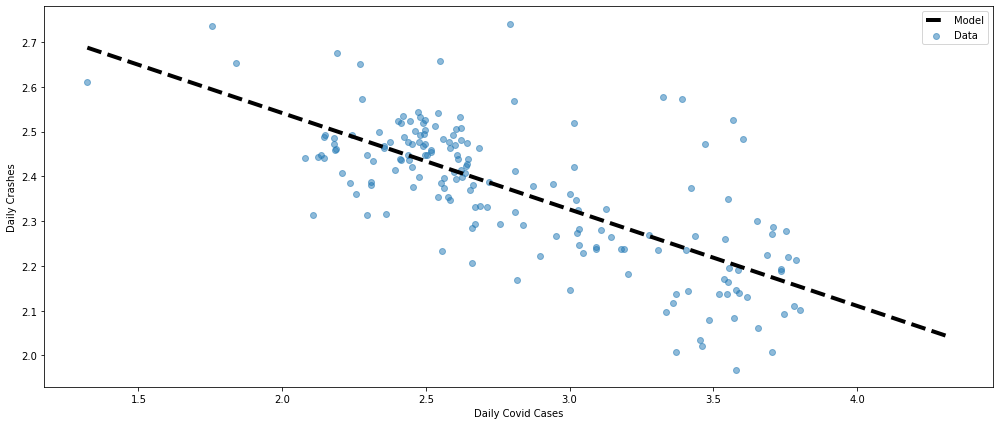

In [ ]:
# Plot the orginal data (as before)
#sns.scatterplot(x='case_count10', y='crash_count10', data=df)
plt.scatter(df['case_count10'], df['crash_count10'], alpha=0.5, label='Data');

# Generate and plot the model fit line
xs = np.arange(df['case_count10'].min(), df['case_count10'].max()+.70)
ys = 2.9722 - 0.2154 * xs
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Daily Covid Cases')
plt.ylabel('Daily Crashes')
plt.legend()